# GitHub Link:

# Import Statements

In [81]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Data Source and Description
* **Link**: https://www.kaggle.com/datasets/jawadawan/global-warming-trends-1961-2022
* **Desc**: Contains temp records from unique countries over many years.

# Problem Statements
* **Main Inquiry**: What are the temperature trends aross different countries over the years?
    - **Sub-Inquiry 1**: How has the global average temperature changed over the years?
    - **Sub-Inquiry 2**: Which countries have experienced the most significant temp changes?
    - **Sub-Inquiry 3**: How has temperature changed over time in specific countries of interest?

In [17]:
df = pd.read_csv('globaltemperaturetrends.csv')

In [19]:
print(df.head())

num_rows, num_columns = df.shape
print('\n[Number of Rows]: ', num_rows)
print('[Number of Columns]: ', num_columns)

                        Country ISO2   Year  Temperature
0  Afghanistan, Islamic Rep. of   AF  F1961       -0.113
1                       Albania   AL  F1961        0.627
2                       Algeria   DZ  F1961        0.164
3                American Samoa   AS  F1961        0.079
4      Andorra, Principality of   AD  F1961        0.736

[Number of Rows]:  11222
[Number of Columns]:  4


# Data Cleaning
* Drop any unwanted features if necessary.
* Check if there are any missing values and address them.
* Check if any duplicates and address them.
* Check the data type of each column and correct them if any.
* For categorical variables, check if any inconsistent inputs and address them.
* For numeric variables, check for outliers and remove/replace with certain value.

In [27]:
# Drop Unwanted Features
#df.drop(columns=['ISO2'], inplace=True)

# Check For/Fill missing values in 'Temperature' with the mean
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)

# Check For/Remove duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing 'Temperature'
df.dropna(subset=['Temperature'], inplace=True)

# Convert 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'], format='F%Y')

# Identify and remove outliers in 'Temperature' using z-scores
z_scores = stats.zscore(df['Temperature'])
outlier_threshold = 2
df = df[abs(z_scores) <= outlier_threshold]

# Exploratory Data Analysis
* Process Data.
* Create graph to visualize result.
* Interpret Result & Explain Findings.

* **Sub-Inquiry 1**: How has the global average temperature changed over the years?

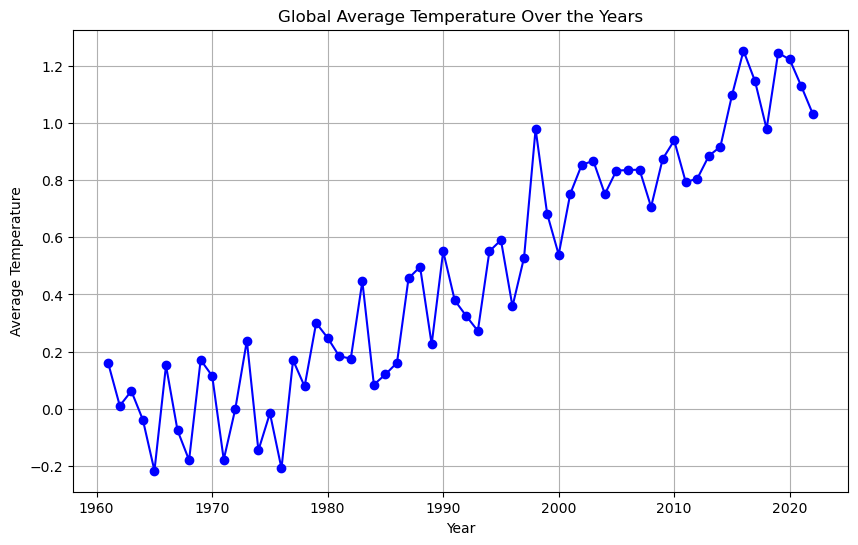

In [111]:
# Sub-Inquiry 1
global_avg_temp = df.groupby('Year')['Temperature'].mean()

plt.figure(figsize=(10, 6))
plt.plot(global_avg_temp.index, global_avg_temp.values, marker='o', linestyle='-', color='b')
plt.title('Global Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

<p>Shows global average temperature trend over the years. Appearing that there is an upward trend, displaying increase in global temperatures over time, showing global warming occuring overtime.<p>

* **Sub-Inquiry 2**: Which countries have experienced the most significant temp changes?

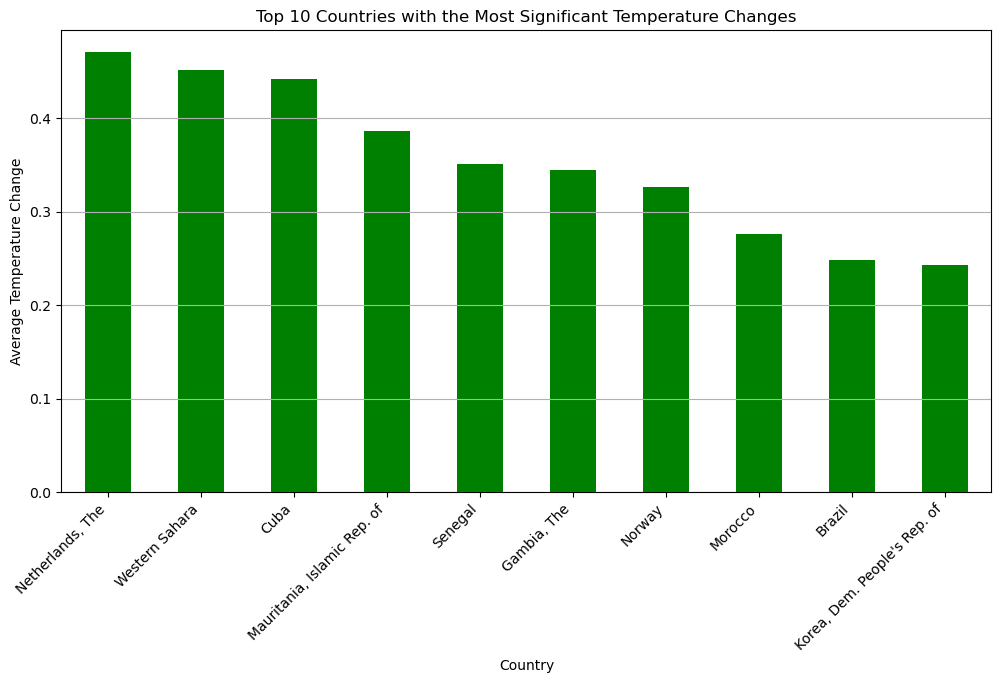

In [112]:
# Sub-Inquiry 2
country_avg_temp_change = df.groupby('Country')['Temperature'].mean().diff()
top_countries_temp_change = country_avg_temp_change.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_countries_temp_change.head(10).plot(kind='bar', color='g')
plt.title('Top 10 Countries with the Most Significant Temperature Changes')
plt.xlabel('Country')
plt.ylabel('Average Temperature Change')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

<p>Displaying top 10 countries that have experienced most significant temperature changes. Providing insights into which countries have seen most dramatic shifts in average temperature.<p>

* **Sub-Inquiry 3**: How has temperature changed over time in specific countries of interest?

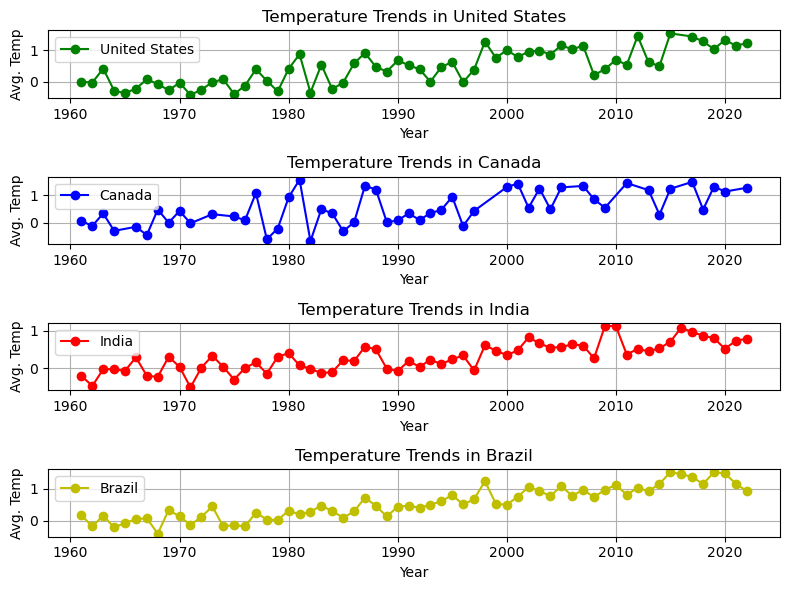

In [108]:
# Sub-Inquiry 3
countries_of_interest = ['United States', 'Canada', 'India', 'Brazil']
filtered_data = df[df['Country'].isin(countries_of_interest)]

colors = ['g', 'b', 'r', 'y']
fig, axes = plt.subplots(nrows=len(countries_of_interest), ncols=1, figsize=(8, 6))
for i, country in enumerate(countries_of_interest):
    country_data = filtered_data[filtered_data['Country'] == country]
    axes[i].plot(country_data['Year'], country_data['Temperature'], marker='o', label=country, color=colors[i])
    axes[i].set_title(f'Temperature Trends in {country}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Avg. Temp')
    axes[i].grid(True)
    axes[i].legend()
plt.tight_layout()
plt.show()

<p>The analysis of temperature trends in the selected countries indicates consistent warming over time. Emphasizing the significance of climate change mitigation efforts and the need for tailored strategies to address regional variations in temperature changes.<p>

# Summary
    
<p>My analysis of global temperature trends has led me to see a clear and very concerning upward trajectory, indicating a sustained increase in global temperature over the years. And my detailed examination of the data shines light upon the top 10 countries with the most pronounced temperature changes, proving the regions that have undoubtably witnessed the most dramatic shifts. Diving into the exploration of some of the most significant countries in the world there has been a consistent pattern of global warming. Highlighting the upmost need for strategies to combat the unique and complex pervasive issue of rising temperatures across the globe.<p>
    
**Should Explore Further**
- **Extreme Events**: Understand how large temp changes may affect heatwaves, tornadoes, etc.
- **Data Quality**: Perhaps, comparing this dataset to another might reveal this dataset is faulty.
- **Public Awareness**: Examine role of public awareness in addressing temperature changes.
- **Global Collaboration**: Investigate how differing countries could agree how combat this issue.